<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 
Author: Arina Lopukhova (@erynn). Edited by [Yury Kashnitskiy](https://yorko.github.io) (@yorko). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

<h1><center>Assignment #1. Fall 2018</center></h1>
<h2><center>Exploratory data analysis of Olympic games with Pandas</center></h2>

__There are ten questions about [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/version/2) dataset in this task. Your task is to fill in the missing Python code and choose answers in [this web-form](https://docs.google.com/forms/d/179HYvlF_0x435CWdu2aOtR9a3flh0YCQXXNXhXaKw2M).__

Download the file `athlete_events.csv` from [Kaggle page](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). The dataset has the following features (copied from Kaggle):

- __ID__ - Unique number for each athlete
- __Name__ - Athlete's name
- __Sex__ - M or F
- __Age__ - Integer
- __Height__ - In centimeters
- __Weight__ - In kilograms
- __Team__ - Team name
- __NOC__ - National Olympic Committee 3-letter code
- __Games__ - Year and season
- __Year__ - Integer
- __Season__ - Summer or Winter
- __City__ - Host city
- __Sport__ - Sport
- __Event__ - Event
- __Medal__ - Gold, Silver, Bronze, or NA

In [21]:
import pandas as pd
import numpy as np

In [22]:
# Para reducir memoria de los datasets:
def reduce_memory(ds_tmp):
    int_columns = ds_tmp.select_dtypes(include=[np.int16,np.int32,np.int64]).columns.tolist()
    for col in int_columns:
        ds_tmp[col] = pd.to_numeric(arg=ds_tmp[col], downcast='integer')

    float_columns = ds_tmp.select_dtypes(include=[np.float64]).columns.tolist()
    for col in float_columns:
        ds_tmp[col] = pd.to_numeric(arg=ds_tmp[col], downcast='float')

In [2]:
# Change the path to the dataset file if needed. 
PATH = 'data/athlete_events.csv'

In [3]:
data = pd.read_csv(PATH)
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Analisys Previosly ...

In [8]:
data.shape

(271116, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [23]:
reduce_memory(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int32
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float32
Height    210945 non-null float32
Weight    208241 non-null float32
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int16
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float32(3), int16(1), int32(1), object(10)
memory usage: 25.3+ MB


In [24]:
data.describe(include="all",percentiles=[0.01,0.05,0.1,0.25,0.5,0.9,0.95,0.99])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372
mean,68248.954396,NaN,NaN,25.556898,175.337067,70.702492,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.394115,10.518490,14.347510,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
1%,1511.000000,NaN,NaN,15.000000,150.000000,43.000000,NaN,NaN,NaN,1904.000000,NaN,NaN,NaN,NaN,NaN
5%,7347.750000,NaN,NaN,18.000000,158.000000,50.000000,NaN,NaN,NaN,1920.000000,NaN,NaN,NaN,NaN,NaN
10%,14102.000000,NaN,NaN,19.000000,162.000000,54.000000,NaN,NaN,NaN,1928.000000,NaN,NaN,NaN,NaN,NaN


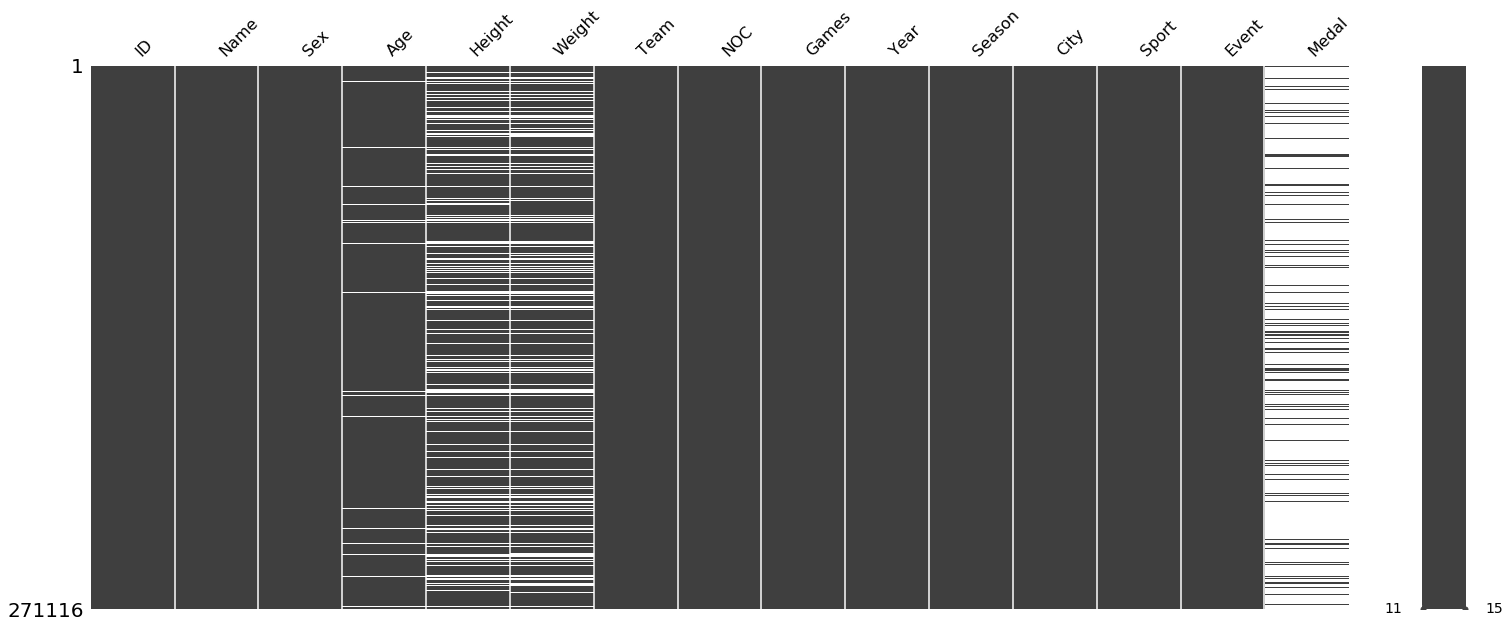

In [16]:
import missingno
missingno.matrix(data)

In [129]:
data.shape

(271116, 15)

In [128]:
data.drop_duplicates().shape

(269731, 15)

## Questions

__1. How old were the youngest male and female participants of the 1996 Olympics?__

- 16 and 15
- 14 and 12 
- 16 and 12
- 13 and 11

In [39]:
data[data.Year == 1996].groupby(by=['Year','Season'],as_index=False)['ID'].count()

,Year,Season,ID
0,1996,Summer,13780


In [41]:
data[data.Year == 1996].groupby(by=['Sex'],as_index=False)['Age'].min()

,Sex,Age
0,F,12.0
1,M,14.0


Answer:

***B) 14 and 12***

In [26]:
data.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


__2. What was the percentage of male gymnasts among all the male participants of the 2000 Olympics? Round the answer to the first decimal.__

*Hint:* here and further if needed drop duplicated sportsmen to count only unique ones. 

- 0.2
- 1.5 
- 2.5
- 7.7

In [171]:
columns_person = ['ID','Name','Sex','Age','Height','Weight','NOC',"Sport"]
data_new = data.loc[np.logical_and(data.Year == 2000,data.Sex == 'M'), columns_person].drop_duplicates()
data_new.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Sport
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,Badminton
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,FIN,Athletics
81,23,Fritz Aanes,M,22.0,187.0,89.0,NOR,Wrestling
93,30,Pepijn Aardewijn,M,30.0,189.0,72.0,NED,Rowing
103,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,NED,Swimming


In [172]:
list_sport = data.Sport.unique()
list_sport_Gymnastics = [sport for sport in list_sport if ('gymnastic' in sport.lower())]
list_sport_Gymnastics

['Gymnastics', 'Rhythmic Gymnastics']

In [173]:
print("Validating unique sportsmen: ")
print(data_new.shape[0])
print(data_new.ID.count())

Validating unique sportsmen: 
6579
6579


In [175]:
data_new["flg_Sgymnastic"] = data_new["Sport"].isin(list_sport_Gymnastics).astype(int)
(data_new.flg_Sgymnastic.value_counts(normalize=True)*100).round(1)

0    98.5
1     1.5
Name: flg_Sgymnastic, dtype: float64

Answer:

***B) 1.5***

__3. What are the mean and standard deviation of height for female basketball players participated in the 2000 Olympics? Round the answer to the first decimal.__

- 178.5 and 7.2
- 179.4 and 10
- 180.7 and 6.7
- 182.4 and 9.1 

In [165]:
columns_person = ['ID','Name','Sex','Age','Height','Weight','NOC',"Sport"]
data_new = data.loc[(data.Year == 2000)&(data.Sex == 'F')&(data.Sport == 'Basketball'), columns_person].drop_duplicates()
data_new.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Sport
1034,580,Svetlana Olegovna Abrosimova,F,20.0,188.0,77.0,RUS,Basketball
1857,1020,Adriana Aparecida dos Santos,F,29.0,180.0,61.0,BRA,Basketball
1863,1023,"Adriana ""Adrianinha"" Moiss Pinto",F,21.0,170.0,65.0,BRA,Basketball
4458,2546,Alessandra dos Santos de Oliveira,F,26.0,200.0,85.0,BRA,Basketball
8185,4516,Nicole Antibe,F,26.0,187.0,83.0,FRA,Basketball


In [169]:
data_new.Height.describe().round(1)

count    142.0
mean     182.4
std        9.1
min      162.0
25%      175.0
50%      182.0
75%      190.0
max      213.0
Name: Height, dtype: float64

Answer:

***D) 182.4 and 9.1***

__4. Find a sportsperson participated in the 2002 Olympics, with the highest weight among other participants of the same Olympics. What sport did he or she do?__

- Judo
- Bobsleigh 
- Weightlifting
- Boxing

In [176]:
data[data.Year == 2002].groupby(by=['Year','Season'],as_index=False)['ID'].count()

,Year,Season,ID
0,2002,Winter,4109


In [201]:
max_Weight = data[data.Year == 2002]['Weight'].max()
data.loc[(data.Year == 2002)&(data.Weight == max_Weight),:]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
99154,50171,Emmanuel Hostache,M,26.0,190.0,123.0,France,FRA,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Two,NaN


In [208]:
data.loc[(data.Year == 2002)&(data.Weight == max_Weight),:].Sport

99154    Bobsleigh
Name: Sport, dtype: object

Answer:

** B) Bobsleigh**

__5. How many times did Pawe Abratkiewicz participate in the Olympics held in different years?__

- 0
- 1 
- 2
- 3 

In [216]:
data.loc[data.Name == 'Pawe Abratkiewicz'].Year.nunique()

3

Answer:

** D)3 **

__6. How many silver medals in tennis did Australia win at the 2000 Olympics?__

- 0
- 1 
- 2 
- 3 

In [9]:
# You code here 

__7. Is it true that Switzerland won fewer medals than Serbia at the 2016 Olympics? Do not consider NaN values in _Medal_ column.__ 

- Yes 
- No

In [10]:
# You code here 

__8. What age category did the fewest and the most participants of the 2014 Olympics belong to?__
- [45-55] and [25-35) correspondingly
- [45-55] and [15-25) correspondingly
- [35-45] and [25-35) correspondingly
- [45-55] and [35-45) correspondingly

In [11]:
# You code here 

__9. Is it true that there were Summer Olympics held in Lake Placid? Is it true that there were Winter Olympics held in Sankt Moritz?__

- Yes, Yes
- Yes, No
- No, Yes 
- No, No 

In [12]:
# You code here 

__10. What is the absolute difference between the number of unique sports at the 1995 Olympics and 2016 Olympics?__

- 16
- 24
- 26
- 34

In [13]:
# You code here 